In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"D:\Cdac_Project\Mini_Project\Walmart-Retail-Dataset.csv")
df.head()

C:\Users\Payal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (22,23,24,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,city,customer_age,customer_name,customer_segment,discount,order_date,order_id,order_priority,order_quantity,product_base_margin,...,shipping_cost,state,unit_price,zip_code,xyz,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Stevens Point,60,Dennis Bolton,Corporate,0.17,29-02-2020,a42c8cff-5757-4e94-80b0-807538fefd25,Not Specified,7,0.55,...,3.772509354,Wisconsin,3.29,54481,NaN,NaN,NaN,NaN,NaN,NaN
1,Stevens Point,60,Dennis Bolton,Corporate,0.17,29-02-2020,1c37f301-564f-40ff-bd7d-73a6c06ede1a,Not Specified,7,0.55,...,816.3408935,Wisconsin,258.98,54481,NaN,NaN,NaN,NaN,NaN,NaN
2,Grapevine,49,Anthony Garverick,Small Business,0.05,11-11-2021,ec649eae-535d-4154-b3ef-c4405bd59da9,Medium,42,0.69,...,4530.505983,Texas,145.98,76051,NaN,NaN,NaN,NaN,NaN,NaN
3,Tempe,30,Anne McFarland,Consumer,0.05,02-08-2020,efdcbace-5320-4005-95e2-4c94a896dc8c,Not Specified,30,0.37,...,128.7315052,Arizona,6.68,85281,NaN,NaN,NaN,NaN,NaN,NaN
4,Coconut Creek,80,Raymond Fair,Home Office,0.14,13-08-2021,8fd6c0f6-9e28-45b5-ba21-a57021ae304d,Low,44,\N,...,33.60838488,Florida,42.76,33063,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039841 entries, 0 to 1039840
Data columns (total 29 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   city                  1039831 non-null  object
 1   customer_age          1039841 non-null  object
 2   customer_name         1039827 non-null  object
 3   customer_segment      1037251 non-null  object
 4   discount              1039839 non-null  object
 5   order_date            1039837 non-null  object
 6   order_id              1039836 non-null  object
 7   order_priority        1037678 non-null  object
 8   order_quantity        1039825 non-null  object
 9   product_base_margin   1039825 non-null  object
 10  product_category      1039824 non-null  object
 11  product_container     1035078 non-null  object
 12  product_name          1035067 non-null  object
 13  product_sub_category  1035078 non-null  object
 14  profit                1035078 non-null  object
 15

In [18]:
dff = df.drop(['Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26','Unnamed: 27', 'Unnamed: 28'],axis=1)

In [19]:
dff.columns

Index(['city', 'customer_age', 'customer_name', 'customer_segment', 'discount',
       'order_date', 'order_id', 'order_priority', 'order_quantity',
       'product_base_margin', 'product_category', 'product_container',
       'product_name', 'product_sub_category', 'profit', 'region', 'sales',
       'ship_date', 'ship_mode', 'shipping_cost', 'state', 'unit_price',
       'zip_code', 'xyz'],
      dtype='object')

In [20]:
unique_counts = dff.nunique()
print(unique_counts)

city                       6195
customer_age                 83
customer_name              5560
customer_segment             15
discount                     36
order_date                 1483
order_id                1035093
order_priority               22
order_quantity               67
product_base_margin          62
product_category             14
product_container            22
product_name               1268
product_sub_category         27
profit                   970645
region                    17699
sales                    192556
ship_date                 11619
ship_mode                  1487
shipping_cost           1013412
state                     17750
unit_price                  778
zip_code                   2867
xyz                        2794
dtype: int64


In [21]:
unique_values = dff['customer_segment'].unique()
print(unique_values)

['Corporate' 'Small Business' 'Consumer' 'Home Office' '\\N' nan
 'a33fbd5f-2d51-4013-97b8-59903883fe44' '6' '44512' '7.28' 'Central' '19'
 '6.28' '0.36' 'Connecticut' '1054.17']


In [6]:
dff.isnull().sum()

city                         10
customer_age                  0
customer_name                14
customer_segment           2590
discount                      2
order_date                    4
order_id                      5
order_priority             2163
order_quantity               16
product_base_margin          16
product_category             17
product_container          4763
product_name               4774
product_sub_category       4763
profit                     4763
region                     4763
sales                      4763
ship_date                  4764
ship_mode                  8194
shipping_cost              4831
state                      4767
unit_price                 4767
zip_code                   4767
xyz                     1022139
dtype: int64

In [7]:
null_percentage = dff.isnull().mean() * 100

In [8]:
print(null_percentage)

city                     0.000962
customer_age             0.000000
customer_name            0.001346
customer_segment         0.249077
discount                 0.000192
order_date               0.000385
order_id                 0.000481
order_priority           0.208013
order_quantity           0.001539
product_base_margin      0.001539
product_category         0.001635
product_container        0.458051
product_name             0.459109
product_sub_category     0.458051
profit                   0.458051
region                   0.458051
sales                    0.458051
ship_date                0.458147
ship_mode                0.788005
shipping_cost            0.464590
state                    0.458435
unit_price               0.458435
zip_code                 0.458435
xyz                     98.297624
dtype: float64


In [40]:
categorical_columns = ['city', 'customer_name', 'customer_segment', 
                       'order_priority', 'product_category', 
                       'product_container', 'product_name', 
                       'product_sub_category', 'region', 
                       'ship_mode', 'state', 'zip_code']

dff[categorical_columns] = dff[categorical_columns].astype('object')

In [41]:
numerical_columns = ['discount', 'order_quantity', 
                     'product_base_margin', 'profit', 'sales', 
                     'shipping_cost', 'unit_price']

dff[numerical_columns] = dff[numerical_columns].apply(pd.to_numeric, errors='coerce')

In [42]:
print(dff.dtypes)  # Check that columns are now the correct type

city                     object
customer_age            float64
customer_name            object
customer_segment         object
discount                float64
order_date               object
order_id                 object
order_priority           object
order_quantity          float64
product_base_margin     float64
product_category         object
product_container        object
product_name             object
product_sub_category     object
profit                  float64
region                   object
sales                   float64
ship_date                object
ship_mode                object
shipping_cost           float64
state                    object
unit_price              float64
zip_code                 object
xyz                      object
dtype: object


In [37]:
dff['zip_code'] = dff['zip_code'].astype(str)

In [4]:
df = pd.read_csv(r"D:\Cdac_Project\Mini_Project\final_file.csv")
df.head()

,city,customer_age,customer_name,customer_segment,discount,order_date,order_id,order_priority,order_quantity,product_base_margin,...,product_sub_category,profit,region,sales,ship_date,ship_mode,shipping_cost,state,unit_price,zip_code
0,Stevens Point,60,Dennis Bolton,Corporate,0.17,2020-02-29,a42c8cff-5757-4e94-80b0-807538fefd25,Not Specified,7,0.55,...,Chairs & Chairmats,19559.92268,Central,21.84,02-03-2020,Delivery Truck,3.772509,Wisconsin,3.29,54481.0
1,Stevens Point,60,Dennis Bolton,Corporate,0.17,2020-02-29,1c37f301-564f-40ff-bd7d-73a6c06ede1a,Not Specified,7,0.55,...,Chairs & Chairmats,19559.92268,Central,1811.67,07-03-2020,Delivery Truck,816.340893,Wisconsin,258.98,54481.0
2,Grapevine,49,Anthony Garverick,Small Business,0.05,2021-11-11,ec649eae-535d-4154-b3ef-c4405bd59da9,Medium,42,0.69,...,Tables,7535.93880,Central,6129.06,15-11-2021,Delivery Truck,4530.505983,Texas,145.98,76051.0
3,Tempe,30,Anne McFarland,Consumer,0.05,2020-08-02,efdcbace-5320-4005-95e2-4c94a896dc8c,Not Specified,30,0.37,...,Paper,18860.92419,West,198.90,08-08-2020,Regular Air,128.731505,Arizona,6.68,85281.0
4,Upper Arlington,84,Sara Luxemburg,Corporate,0.25,2020-09-26,6b88eca0-426a-4fd4-83c6-1657c43f94a0,High,31,0.77,...,Computer Peripherals,20175.51620,East,243.97,30-09-2020,Express Air,17.811073,Ohio,8.12,43221.0


In [15]:
df.columns

Index(['city', 'customer_age', 'customer_name', 'customer_segment', 'discount',
       'order_date', 'order_id', 'order_priority', 'order_quantity',
       'product_base_margin', 'product_category', 'product_container',
       'product_name', 'product_sub_category', 'profit', 'region', 'sales',
       'ship_date', 'ship_mode', 'shipping_cost', 'state', 'unit_price',
       'zip_code'],
      dtype='object')

In [34]:
df.dtypes

city                     object
customer_age              int64
customer_name            object
customer_segment         object
discount                float64
order_date               object
order_id                 object
order_priority           object
order_quantity            int64
product_base_margin     float64
product_category         object
product_container        object
product_name             object
product_sub_category     object
profit                  float64
region                   object
sales                   float64
ship_date                object
ship_mode                object
shipping_cost           float64
state                    object
unit_price              float64
zip_code                float64
dtype: object

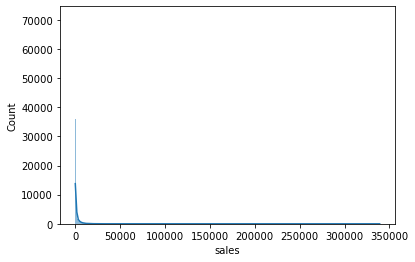

In [32]:
sns.histplot(df['sales'], kde=True)
plt.show()

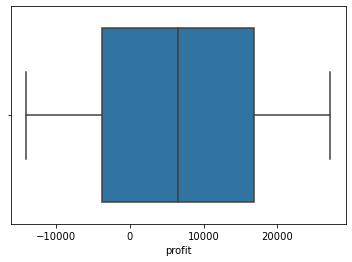

<Figure size 720x576 with 0 Axes>

In [16]:
sns.boxplot(x=df['profit'])
plt.figure(figsize=(10, 8))
plt.show()

## the counts of categorical variables

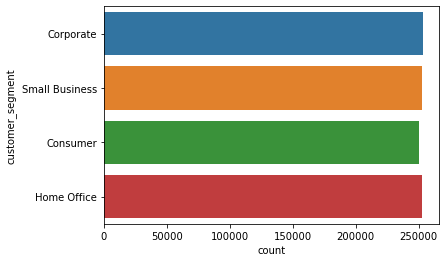

In [17]:
sns.countplot(y=df['customer_segment'])
plt.show()

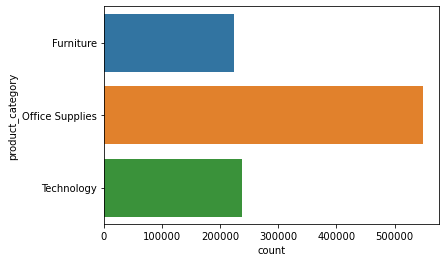

In [18]:
sns.countplot(y=df['product_category'])
plt.show()

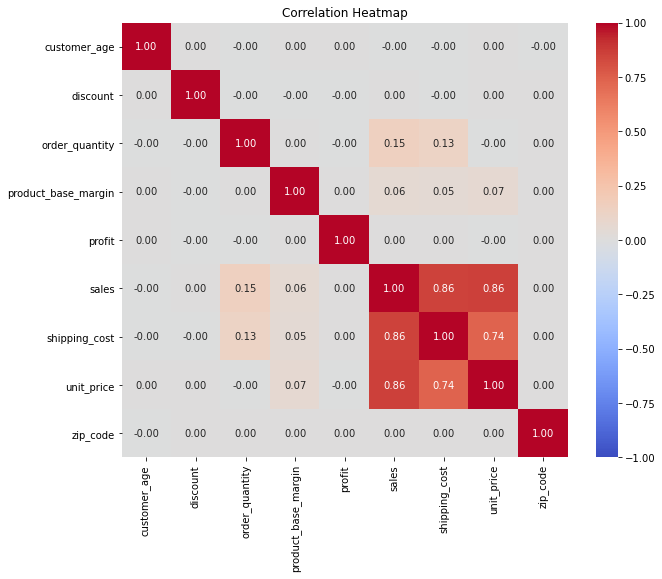

In [19]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

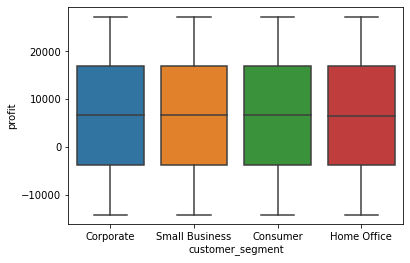

In [24]:
sns.boxplot(x='customer_segment', y='profit', data=df)
plt.show()

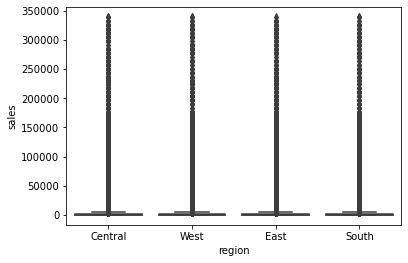

In [25]:
sns.boxplot(x='region', y='sales', data=df)
plt.show()

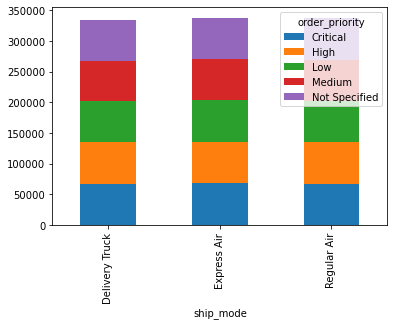

<Figure size 720x576 with 0 Axes>

In [5]:
pd.crosstab(df['ship_mode'], df['order_priority']).plot(kind='bar', stacked=True)
plt.figure(figsize=(10, 8))
plt.show()

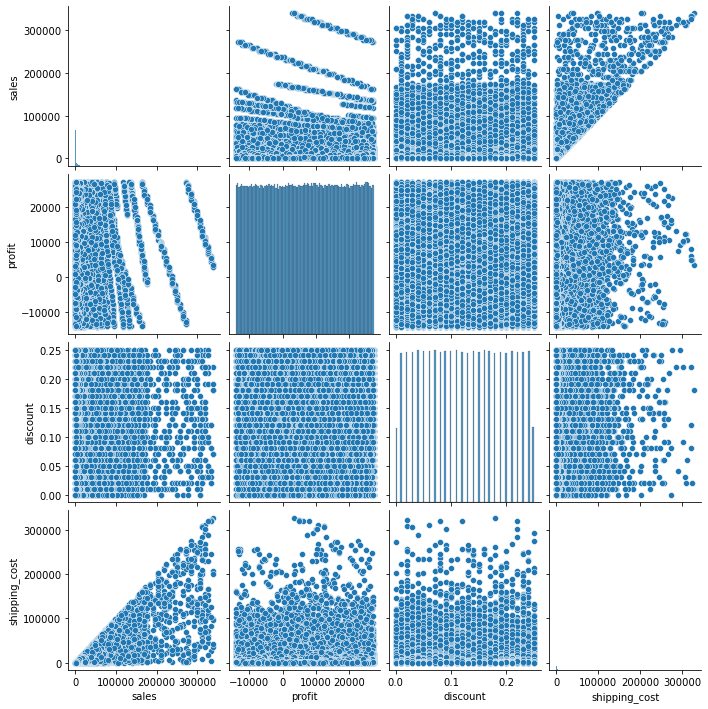

In [28]:
sns.pairplot(df[['sales', 'profit', 'discount', 'shipping_cost']])
plt.show()

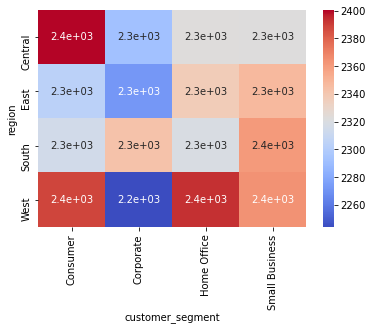

<Figure size 720x576 with 0 Axes>

In [20]:
sns.heatmap(pd.pivot_table(df, values='sales', index='region', columns='customer_segment'), annot=True, cmap='coolwarm')
plt.show()

In [30]:
sales_by_category = df.groupby('product_category')['sales'].sum().reset_index()
print(sales_by_category)

  product_category         sales
0        Furniture  6.243247e+08
1  Office Supplies  5.559372e+08
2       Technology  1.172465e+09


In [7]:
unique_count = df['sales'].nunique()
print(f"Unique count: {unique_count}")

Unique count: 190236


In [9]:
max_value = df['sales'].max()
print(f"Maximum value: {max_value}")

Maximum value: 339147.5


In [11]:
min_value = df['sales'].min()
print(f"Minimum value: {min_value}")

Minimum value: 0.76


In [ ]:
month wise sales